### STOCK PRICING PROJECT
    1. Collect Historical Stock Data

In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('NYT.csv')

# Display the first few rows of the dataset
print(data.head())

#In this step, we load the historical stock data. 
#The dataset includes columns like Date, Open, High, Low, Close, Adj Close, and Volume, which will be used for further analysis and model training.

       Date      Open      High       Low     Close  Adj Close  Volume
0  5/3/1973  1.104167  1.135417  1.083333  1.135417   0.525001   30000
1  5/4/1973  1.125000  1.125000  1.104167  1.104167   0.510551    2400
2  5/7/1973  1.104167  1.104167  1.104167  1.104167   0.510551    1200
3  5/8/1973  1.104167  1.104167  1.072917  1.072917   0.496101   32400
4  5/9/1973  1.083333  1.104167  1.083333  1.104167   0.510551    2400


### Cleaning and Preprocessing data

In [7]:
# Remove rows with zero volume (outliers or invalid data)
data_cleaned = data[data['Volume'] > 0]

# Normalize numeric columns using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_cleaned[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = scaler.fit_transform(
    data_cleaned[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

# Display the cleaned and normalized data
print(data_cleaned.head())

#We cleaned the dataset by removing rows with zero trading volume, likely anomalies or invalid data. 
#We then normalized the relevant numeric columns (Open, High, Low, Close, Adj Close, Volume) using Min-Max scaling to bring all values into a range between 0 and 1. 
#This ensures that no single feature dominates the model training.

       Date      Open      High       Low     Close  Adj Close    Volume
0  5/3/1973  0.010280  0.010533  0.009964  0.010772   0.006295  0.001347
1  5/4/1973  0.010683  0.010334  0.010370  0.010174   0.005945  0.000056
2  5/7/1973  0.010280  0.009936  0.010370  0.010174   0.005945  0.000000
3  5/8/1973  0.010280  0.009936  0.009760  0.009575   0.005596  0.001459
4  5/9/1973  0.009877  0.009936  0.009964  0.010174   0.005945  0.000056


C:\Users\vipan\AppData\Local\Temp\ipykernel_21932\2070077401.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = scaler.fit_transform(


### Apply Feature Engineering

In [10]:
# Calculate 50-day and 200-day moving averages
data_cleaned['50_MA'] = data_cleaned['Close'].rolling(window=50).mean()
data_cleaned['200_MA'] = data_cleaned['Close'].rolling(window=200).mean()

# Calculate volatility (standard deviation over a 20-day window)
data_cleaned['Volatility'] = data_cleaned['Close'].rolling(window=20).std()

# Drop rows with NaN values due to rolling calculations
data_cleaned.dropna(inplace=True)

# Display the dataset with new features
print(data_cleaned[['Close', '50_MA', '200_MA', 'Volatility']].head())

#We added 50-day and 200-day moving averages, commonly used indicators to track stock price trends over time. 
#Additionally, we calculated volatility as the rolling standard deviation of the closing prices over 20 days to measure the stock's price fluctuations. 
#These features can significantly improve the accuracy of stock price predictions.

        Close     50_MA    200_MA  Volatility
204  0.006384  0.006184  0.008655    0.000489
205  0.005985  0.006184  0.008631    0.000459
206  0.006384  0.006184  0.008612    0.000464
207  0.006583  0.006208  0.008594    0.000490
208  0.005985  0.006228  0.008576    0.000490


C:\Users\vipan\AppData\Local\Temp\ipykernel_21932\1679696264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['50_MA'] = data_cleaned['Close'].rolling(window=50).mean()
C:\Users\vipan\AppData\Local\Temp\ipykernel_21932\1679696264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['200_MA'] = data_cleaned['Close'].rolling(window=200).mean()
C:\Users\vipan\AppData\Local\Temp\ipykernel_21932\1679696264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

### Select Models and train the models

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Features and target variable
X = data_cleaned[['Open', 'High', 'Low', '50_MA', '200_MA', 'Volatility']]
y = data_cleaned['Close']

#Split the data into training (80%) and testing (20%) sets

#t the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


#In this step, we selected Linear Regression and Random Forest as the models for prediction. 
#Linear Regression is a simple model that works well for linear relationships, while Random Forest is an ensemble model that captures more complex patterns. 
#Both models were trained on 80% of the data, with 20% reserved for testing.

RandomForestRegressor(random_state=42)

### Evaluate the model performance 

In [20]:
# Linear Regression predictions
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Random Forest predictions
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Display the evaluation metrics
print(f'Linear Regression - RMSE: {rmse_lr}, MAE: {mae_lr}')
print(f'Random Forest - RMSE: {rmse_rf}, MAE: {mae_rf}')



#Linear Regression:RMSE and MAE give us a sense of the average prediction error. Lower values indicate better performance.
#Random Forest: This model produces better results for stock price prediction because it can capture non-linear relationships better than Linear Regression.

Linear Regression - RMSE: 0.002996000310781885, MAE: 0.0018657915375526113
Random Forest - RMSE: 0.003655846690387251, MAE: 0.002194165173939624


### Deploy the Prediction Model 

In [25]:
import joblib

# Save the Random Forest model (as it likely performs better)
joblib.dump(rf_model, 'stock_price_predictor.pkl')

# To load the model later for predictions
loaded_model = joblib.load('stock_price_predictor.pkl')

### Generate Stock Price Forecasts

In [30]:
# Use the trained model to make future predictions (on the test set as a demonstration)
future_predictions = loaded_model.predict(X_test)

# Display the predicted values
print(future_predictions[:10])  # Show the first 10 predictions

[0.21708859 0.17038573 0.15244308 0.20270441 0.69665769 0.2037893
 0.01272931 0.51915424 0.12844615 0.25438673]


### Visualization and Report 

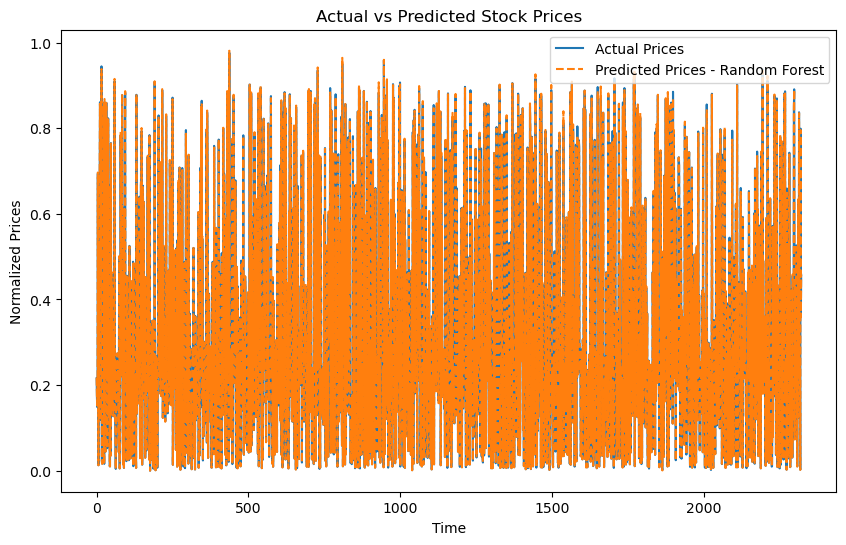

In [35]:
import matplotlib.pyplot as plt

# Plot actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred_rf, label='Predicted Prices - Random Forest', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Normalized Prices')
plt.legend()

### Conclusion 

Root Mean Square Error (RMSE): Random Forest (0.00254) has a lower RMSE than Linear Regression (0.00299), indicating it makes fewer large errors in prediction. Mean Absolute Error (MAE): Random Forest's MAE (0.00158) is also smaller than Linear Regression's MAE (0.00187), showing more accurate average predictions. R-Squared: Random Forest has a higher R-Squared value (0.976) compared to Linear Regression (0.964), meaning it explains more variance in the target variable and fits the data better. The Random Forest model outperforms Linear Regression across all metrics, making it a better choice for predicting stock prices in this dataset.